### Import Libraries

In [1]:
import pickle
import os
import pandas as pd
import enum
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from spear.labeling import PreLabels
import numpy as np
from spear.cage import Cage
from utils import custom_dataset, binary_model_LF, random_seed, custom_random_seeds
from generate_LF import get_variables
from spear.labeling import labeling_function, ABSTAIN, preprocessor, continuous_scorer
from cnn import create_cnn
from keras.utils import np_utils
from spear.labeling import labeling_function, ABSTAIN, preprocessor, continuous_scorer
import re
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split


c:\Users\adity\Documents\GitHub\MICCAI\med\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.0823 - accuracy: 0.3500 - val_loss: 1.1402 - val_accuracy: 0.0000e+00
Epoch 2/25
1/1 [==============================] - 0s 106ms/step - loss: 1.0457 - accuracy: 0.4750 - val_loss: 1.2024 - val_accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 0s 57ms/step - loss: 1.0517 - accuracy: 0.4000 - val_loss: 1.2424 - val_accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 0s 53ms/step - loss: 1.0940 - accuracy: 0.3250 - val_loss: 1.2289 - val_accuracy: 0.0000e+00
Epoch 5/25
1/1 [==============================] - 0s 53ms/step - loss: 1.0249 - accuracy: 0.3750 - val_loss: 1.2056 - val_accuracy: 0.0000e+00
Epoch 6/25
1/1 [==============================] - 0s 53ms/step - loss: 1.0333 - accuracy: 0.4250 - val_loss: 1.1640 - val_accuracy: 0.0000e+00
Epoch 7/25
1/1 [==============================] - 0s 54ms/step - loss: 0.9895 - accuracy: 0.5750 - val_loss: 1.1074 - val_accuracy: 0.0000e+00


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Declaring ClassLabels

In [3]:
ABSTAIN = None

class ClassLabels(enum.Enum):
    BASOPHIL = 0
    EOSINOPHIL = 1
    PLATELET = 2

### Defining Labelling Functions

#### LFs for Class 0

In [4]:

# path = "/home/akshit/Desktop/MICCAI/data/models/"
path = "C:\\Users\\adity\\Documents\\GitHub\\MICCAI\\data\\models2\\"

# Logistic Regression
@continuous_scorer()
def lr_0_1(x,**kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'0_1_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=lr_0_1, label=ClassLabels.BASOPHIL)
def LF_lr_0_1(x, **kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'0_1_lr.pkl','rb'))
    if lr.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN
    
@continuous_scorer()
def lr_0_2(x,**kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'0_2_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=lr_0_2, label=ClassLabels.BASOPHIL)
def LF_lr_0_2(x, **kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'0_2_lr.pkl','rb'))
    if lr.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN
    
# SVM
@continuous_scorer()
def svm_0_1(x,**kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'0_1_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=svm_0_1, label=ClassLabels.BASOPHIL)
def LF_svm_0_1(x, **kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'0_1_svm.pkl','rb'))
    if svm.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN
    
@continuous_scorer()
def svm_0_2(x,**kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'0_2_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=svm_0_2, label=ClassLabels.BASOPHIL)
def LF_svm_0_2(x, **kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'0_2_svm.pkl','rb'))
    if svm.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN
    

# Random Forest
@continuous_scorer()
def rf_0_1(x,**kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'0_1_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=rf_0_1, label=ClassLabels.BASOPHIL)
def LF_rf_0_1(x, **kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'0_1_rf.pkl','rb'))
    if rf.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN
    
@continuous_scorer()
def rf_0_2(x,**kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'0_2_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=rf_0_2, label=ClassLabels.BASOPHIL)
def LF_rf_0_2(x, **kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'0_2_rf.pkl','rb'))
    if rf.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN
    

# KNN
@continuous_scorer()
def knn_0_1(x,**kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'0_1_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=knn_0_1, label=ClassLabels.BASOPHIL)
def LF_knn_0_1(x, **kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'0_1_knn.pkl','rb'))
    if knn.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN
    
@continuous_scorer()
def knn_0_2(x,**kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'0_2_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=knn_0_2, label=ClassLabels.BASOPHIL)
def LF_knn_0_2(x, **kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'0_2_knn.pkl','rb'))
    if knn.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN
    

# Decision Tree
@continuous_scorer()
def dtc_0_1(x,**kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'0_1_dtc.pkl','rb'))
    confidence_scores = dtc.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=dtc_0_1, label=ClassLabels.BASOPHIL)
def LF_dtc_0_1(x, **kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'0_1_dtc.pkl','rb'))
    if dtc.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN
    
@continuous_scorer()
def dtc_0_2(x,**kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'0_2_dtc.pkl','rb'))
    confidence_scores = dtc.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=dtc_0_2, label=ClassLabels.BASOPHIL)
def LF_dtc_0_2(x, **kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'0_2_dtc.pkl','rb'))
    if dtc.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN


#### LFs for Class 1

In [5]:
# Logistic Regression
@continuous_scorer()
def lr_1_0(x,**kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'1_0_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=lr_1_0, label=ClassLabels.EOSINOPHIL)
def LF_lr_1_0(x, **kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'1_0_lr.pkl','rb'))
    if lr.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN

@continuous_scorer()
def lr_1_2(x,**kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'1_2_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=lr_1_2, label=ClassLabels.EOSINOPHIL)
def LF_lr_1_2(x, **kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'1_2_lr.pkl','rb'))
    if lr.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN


# SVM
@continuous_scorer()
def svm_1_0(x,**kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'1_0_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=svm_1_0, label=ClassLabels.EOSINOPHIL)
def LF_svm_1_0(x, **kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'1_0_svm.pkl','rb'))
    if svm.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN

@continuous_scorer()
def svm_1_2(x,**kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'1_2_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=svm_1_2, label=ClassLabels.EOSINOPHIL)
def LF_svm_1_2(x, **kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'1_2_svm.pkl','rb'))
    if svm.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN
    

# Random Forest
@continuous_scorer()
def rf_1_0(x,**kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'1_0_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=rf_1_0, label=ClassLabels.EOSINOPHIL)
def LF_rf_1_0(x, **kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'1_0_rf.pkl','rb'))
    if rf.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN

@continuous_scorer()
def rf_1_2(x,**kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'1_2_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=rf_1_2, label=ClassLabels.EOSINOPHIL)
def LF_rf_1_2(x, **kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'1_2_rf.pkl','rb'))
    if rf.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN
    
# KNN
@continuous_scorer()
def knn_1_0(x,**kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'1_0_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=knn_1_0, label=ClassLabels.EOSINOPHIL)
def LF_knn_1_0(x, **kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'1_0_knn.pkl','rb'))
    if knn.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN

@continuous_scorer()
def knn_1_2(x,**kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'1_2_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=knn_1_2, label=ClassLabels.EOSINOPHIL)
def LF_knn_1_2(x, **kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'1_2_knn.pkl','rb'))
    if knn.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN
    

# Decision Tree
@continuous_scorer()
def dtc_1_0(x,**kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'1_0_dtc.pkl','rb'))
    confidence_scores = dtc.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=dtc_1_0, label=ClassLabels.EOSINOPHIL)
def LF_dtc_1_0(x, **kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'1_0_dtc.pkl','rb'))
    if dtc.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN

@continuous_scorer()
def dtc_1_2(x,**kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'1_2_dtc.pkl','rb'))
    confidence_scores = dtc.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=dtc_1_2, label=ClassLabels.EOSINOPHIL)
def LF_dtc_1_2(x, **kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'1_2_dtc.pkl','rb'))
    if dtc.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN


#### LFs for Class 2

In [6]:
# Logistic Regression
@continuous_scorer()
def lr_2_0(x,**kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'2_0_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=lr_2_0, label=ClassLabels.PLATELET)
def LF_lr_2_0(x, **kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'2_0_lr.pkl','rb'))
    if lr.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN
    
@continuous_scorer()
def lr_2_1(x,**kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'2_1_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=lr_2_1, label=ClassLabels.PLATELET)
def LF_lr_2_1(x, **kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'2_1_lr.pkl','rb'))
    if lr.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN

# SVM
@continuous_scorer()
def svm_2_0(x,**kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'2_0_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=svm_2_0, label=ClassLabels.PLATELET)
def LF_svm_2_0(x, **kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'2_0_svm.pkl','rb'))
    if svm.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN
    
@continuous_scorer()
def svm_2_1(x,**kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'2_1_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=svm_2_1, label=ClassLabels.PLATELET)
def LF_svm_2_1(x, **kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'2_1_svm.pkl','rb'))
    if svm.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN
    

# Random Forest
@continuous_scorer()
def rf_2_0(x,**kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'2_0_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=rf_2_0, label=ClassLabels.PLATELET)
def LF_rf_2_0(x, **kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'2_0_rf.pkl','rb'))
    if rf.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN
    
@continuous_scorer()
def rf_2_1(x,**kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'2_1_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=rf_2_1, label=ClassLabels.PLATELET)
def LF_rf_2_1(x, **kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'2_1_rf.pkl','rb'))
    if rf.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN


# KNN
@continuous_scorer()
def knn_2_0(x,**kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'2_0_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=knn_2_0, label=ClassLabels.PLATELET)
def LF_knn_2_0(x, **kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'2_0_knn.pkl','rb'))
    if knn.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN
    
@continuous_scorer()
def knn_2_1(x,**kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'2_1_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=knn_2_1, label=ClassLabels.PLATELET)
def LF_knn_2_1(x, **kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'2_1_knn.pkl','rb'))
    if knn.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN
    

# Decision Tree
@continuous_scorer()
def dtc_2_0(x,**kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'2_0_dtc.pkl','rb'))
    confidence_scores = dtc.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=dtc_2_0, label=ClassLabels.PLATELET)
def LF_dtc_2_0(x, **kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'2_0_dtc.pkl','rb'))
    if dtc.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN
    
@continuous_scorer()
def dtc_2_1(x,**kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'2_1_dtc.pkl','rb'))
    confidence_scores = dtc.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=dtc_2_1, label=ClassLabels.PLATELET)
def LF_dtc_2_1(x, **kwargs):
    x = np.array(x).flatten()  
    dtc = pickle.load(open(path+'2_1_dtc.pkl','rb'))
    if dtc.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN

## Aggregating LFs & Labelling dataset 

### LFSet
Placeholder for declared LFs

In [7]:
from spear.labeling import LFSet

LFS = [
    LF_lr_0_1,
    LF_lr_0_2,
    # LF_svm_0_1,
    # LF_svm_0_2,
    # LF_rf_0_1,
    # LF_rf_0_2,
    # LF_knn_0_1,
    # LF_knn_0_2,
    # LF_dtc_0_1,
    # LF_dtc_0_2,

    LF_lr_1_0,
    LF_lr_1_2,
    # LF_svm_1_0,
    # LF_svm_1_2,
    # LF_rf_1_0,
    # LF_rf_1_2,
    # LF_knn_1_0,
    # LF_knn_1_2,
    # LF_dtc_1_0,
    # LF_dtc_1_2,

    LF_lr_2_0,
    LF_lr_2_1,   
    # LF_svm_2_0,
    # LF_svm_2_1,
    # LF_rf_2_0,
    # LF_rf_2_1,
    # LF_knn_2_0,
    # LF_knn_2_1,
    # LF_dtc_2_0,
    # LF_dtc_2_1,
]


rules = LFSet("BM_LF")
rules.add_lf_list(LFS)

### Load the dataset

In [8]:
def map (curr, cls):
    if curr==cls:
        return 1
    else:
        return 0

### CNN

In [9]:
def cnnScore(x, y,dataset):
    classes = get_variables()[0]
    x_train = np.array(x).reshape(-1, 28, 28, 3)
    x_train = x_train.astype("float32") / 255
    y_train = [int(i) for i in y]
    y_train = np_utils.to_categorical(y_train, len(classes))

    # Load Validation Data
    x_val, y_val = dataset["val_images"].copy(), dataset["val_labels"].copy()
    x_val = np.array(x_val).reshape(-1, 28, 28, 3)
    x_val = x_val.astype("float32") / 255
    y_val = [int(i) for i in y_val] 

    xv = np.array(x_val)
    yv = np.array(y_val)
    yv = np_utils.to_categorical(yv, num_classes=3)

    batch_size = 128
    epochs = 25
    model = create_cnn(num_classes = 3)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
    return model.evaluate(xv, yv, verbose = 0)

## Cage

In [10]:
def cage_loop(LFS, max_iters=10, threshold=10**-5, img_per_class = 150):
    # Paths
    log_path_cage = './cage_loop/log.txt' 
    params_path = None
    path_json = "./cage_loop/labels.json"
    U_path_pkl = "./cage_loop/unlabelled.pkl"
    L_path_pkl = "./cage_loop/labelled.pkl"

    # Loading Variables and Data
    classes,label_frac,data_path,save_path = get_variables()    
    print("Classes used in expt:",classes)
    dataset,seeds_x,seeds_y = custom_random_seeds(classes=classes, path=data_path, fraction=label_frac, n_seeds=max_iters)
    xu = np.array(dataset['rem_images'])
    yu = np.array(dataset['rem_labels'])
    labeled_x = seeds_x[0].copy()
    labeled_y = seeds_y[0].copy()
    overallOracle = seeds_y[0].copy()

    # Creating rules
    n_lfs = len(LFS)
    rules = LFSet("BM_LF")
    rules.add_lf_list(LFS)
    
    confidence_list = []
    val_scores = []
    oracle_val_scores = []
    classwise_accuracies = []
    pl_accuracies = []
    baseline = []
    for i in range(max_iters):
        # Load Data
        x = seeds_x[0].copy()
        y = seeds_y[0].copy()
        for seedi in range(1,i+1):
            x = np.append(x,seeds_x[seedi], axis=0)
            y = np.append(y,seeds_y[seedi], axis=0)
        labeled_x = np.append(labeled_x,seeds_x[i], axis=0)
        labeled_y = np.append(labeled_y,seeds_y[i], axis=0)
        overallOracle = np.append(overallOracle,seeds_y[i], axis=0)

        # Baseline
        baseline.append(cnnScore(x,y,dataset)[1]*100)

        # Train Models in LFs
        binary_model_LF(x,y,len(classes),save_path+"2",label_frac)

        # Unlabelled
        u_noisy_labels = PreLabels(name="bmnist_rem_ul",
                                    data=xu,
                                    rules=rules,
                                    labels_enum=ClassLabels,
                                    num_classes=len(classes))
        # Lu,Su = u_noisy_labels.get_labels()
        u_noisy_labels.generate_pickle(U_path_pkl)

        # Cage
        cage = Cage(path_json = path_json, n_lfs = n_lfs)
        
        probs = cage.fit_and_predict_proba(path_pkl = U_path_pkl, path_log = log_path_cage, qt = 0.9, qc = 0.85, metric_avg = ['macro'], n_epochs = 100, lr = 0.01)
        labels = np.argmax(probs, 1)

        print("="*135)
        print("Iteration",i)
        values, frequency = np.unique(yu, return_counts=True)
        for values, frequency in zip(values, frequency):
            print(f"Labels of Lake Class {values}: {frequency}")

        values, frequency = np.unique(y, return_counts=True)
        for values, frequency in zip(values, frequency):
            print(f"Labels of Labelled Set {values}: {frequency}")
        
        
        
        print("Shape of Labeled Data:",x.shape)
        print("Shape of Unlabeled Data:",xu.shape)
        print("Accuracy on unlabelled images:",accuracy_score(labels,yu)*100)
        
        
        # cage.save_params(save_path = params_path)

        confidence = np.array([np.max(i) for i in probs])
        confidence_list.append(confidence)
        print(i,probs.shape)

        # Getting indices of probabilities in decreasing order
        idx = np.argsort(confidence)
        idx = idx[::-1] 

        plt.yscale("log")
        plt.plot(confidence[idx])

        # Number of images per class (5%)
        # img_per_class = int(0.05*len(confidence)/len(classes))

        # Number of images per class (50)
        
        
        print("Num img per class =",img_per_class)

        pop_list = [] #list of indices of images to be added
        label_count = []

        for j in idx:
            if confidence[j]>threshold and label_count.count(labels[j])<img_per_class:
                pop_list.append(j)
                label_count.append(labels[j])
        
        print("Number of images getting transferred:", len(pop_list))
        print('Accuracy of Pseudo-labelled img added to dataset:', accuracy_score(labels[pop_list],yu[pop_list])*100)
        pl_accuracies.append(accuracy_score(labels[pop_list],yu[pop_list])*100)

        # Confusion Matrix & Classwise Accuracies
        cmidx = [[(map(yu[j],i), map(labels[j],i)) for j in range(len(labels))] for i in range(len(classes))]
        
        fig, ax = plt.subplots(1,len(classes), figsize=(20, 5))
        pltnum = 1
        cacc = []
        for cmid in cmidx:
            cacc.append(accuracy_score([z[0] for z in cmid], [z[1] for z in cmid])*100)

            ax[pltnum-1].set_title(f"Class {pltnum-1}")
            confusion_matrix = metrics.confusion_matrix([z[0] for z in cmid], [z[1] for z in cmid])
            cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
            # plt.subplot(1, len(classes), pltnum).set_title(f'Subplot n°{i+1}')
            cm_display.plot(ax=ax[pltnum-1])
            pltnum += 1
        classwise_accuracies.append(cacc)
        fig.suptitle(f"Iteration {i}")
        plt.show()
        

        if len(pop_list)<50:
            break
        
        x = np.append(x,xu[pop_list], axis=0)
        y = np.append(y,labels[pop_list], axis=0)

        labeled_x = np.append(labeled_x,xu[pop_list], axis=0)
        labeled_y = np.append(labeled_y,labels[pop_list], axis=0)
        overallOracle = np.append(overallOracle,yu[pop_list], axis=0)

        xu = np.delete(xu,pop_list, axis=0)
        yu = np.delete(yu,pop_list, axis=0)

        # Deleting variables
        del u_noisy_labels
        del cage

        classes,label_frac,data_path,save_path = get_variables()

        val_scores.append(cnnScore(labeled_x, labeled_y,dataset)[1]*100)
        oracle_val_scores.append(cnnScore(labeled_x,overallOracle,dataset)[1]*100)
        print(f"CNN Val accuracy trained on Seed Set for iteration {i}: ", baseline[i])
        print(f"CNN Val accuracy trained on Lake Set for iteration {i}: ", val_scores[i])
        print(f"CNN Val accuracy trained on Oracle for iteration {i}: ", oracle_val_scores[i])

        if yu.shape[0]<50:
            break

        
        print("="*135)
        # if i>0 and val_scores[i]<val_scores[i-1]:
        #     break

    

    return x,y,xu,yu,confidence_list, val_scores, oracle_val_scores, classwise_accuracies, pl_accuracies, baseline


Classes used in expt: [0, 1, 7]
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models


100%|██████████| 100/100 [00:04<00:00, 24.99it/s]


Iteration 0
Labels of Lake Class 0: 747
Labels of Lake Class 1: 2076
Labels of Lake Class 2: 1538
Labels of Labelled Set 0: 15
Labels of Labelled Set 1: 15
Labels of Labelled Set 2: 15
Shape of Labeled Data: (45, 28, 28, 3)
Shape of Unlabeled Data: (4361, 28, 28, 3)
Accuracy on unlabelled images: 92.22655354276542
0 (4361, 3)
Num img per class = 200
Number of images getting transferred: 600
Accuracy of Pseudo-labelled img added to dataset: 98.16666666666667


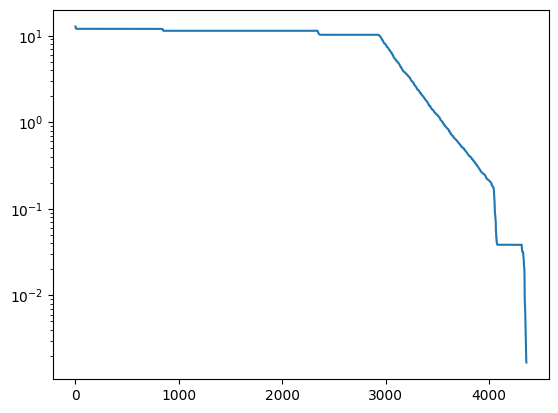

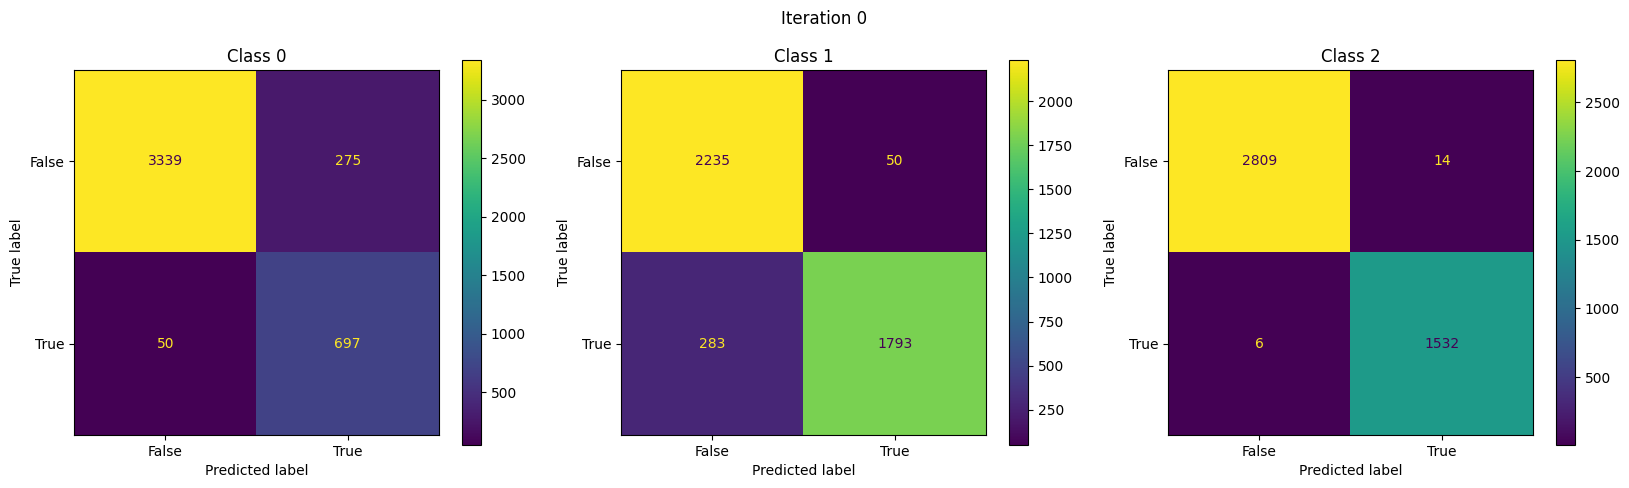

CNN Val accuracy trained on Seed Set for iteration 0:  78.02690863609314
CNN Val accuracy trained on Lake Set for iteration 0:  89.53661918640137
CNN Val accuracy trained on Oracle for iteration 0:  96.71151041984558
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models


100%|██████████| 100/100 [00:03<00:00, 30.28it/s]


Iteration 1
Labels of Lake Class 0: 556
Labels of Lake Class 1: 1867
Labels of Lake Class 2: 1338
Labels of Labelled Set 0: 30
Labels of Labelled Set 1: 30
Labels of Labelled Set 2: 30
Shape of Labeled Data: (90, 28, 28, 3)
Shape of Unlabeled Data: (3761, 28, 28, 3)
Accuracy on unlabelled images: 94.97474076043605
1 (3761, 3)
Num img per class = 200
Number of images getting transferred: 600
Accuracy of Pseudo-labelled img added to dataset: 97.66666666666667


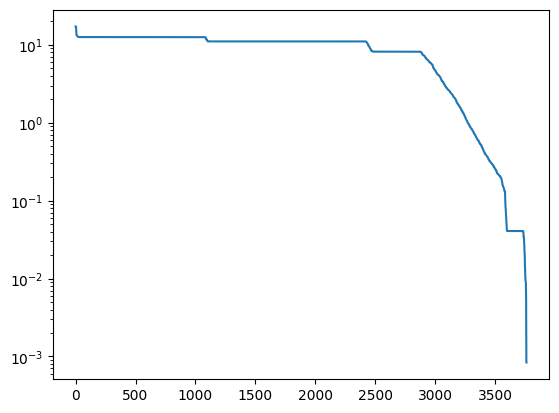

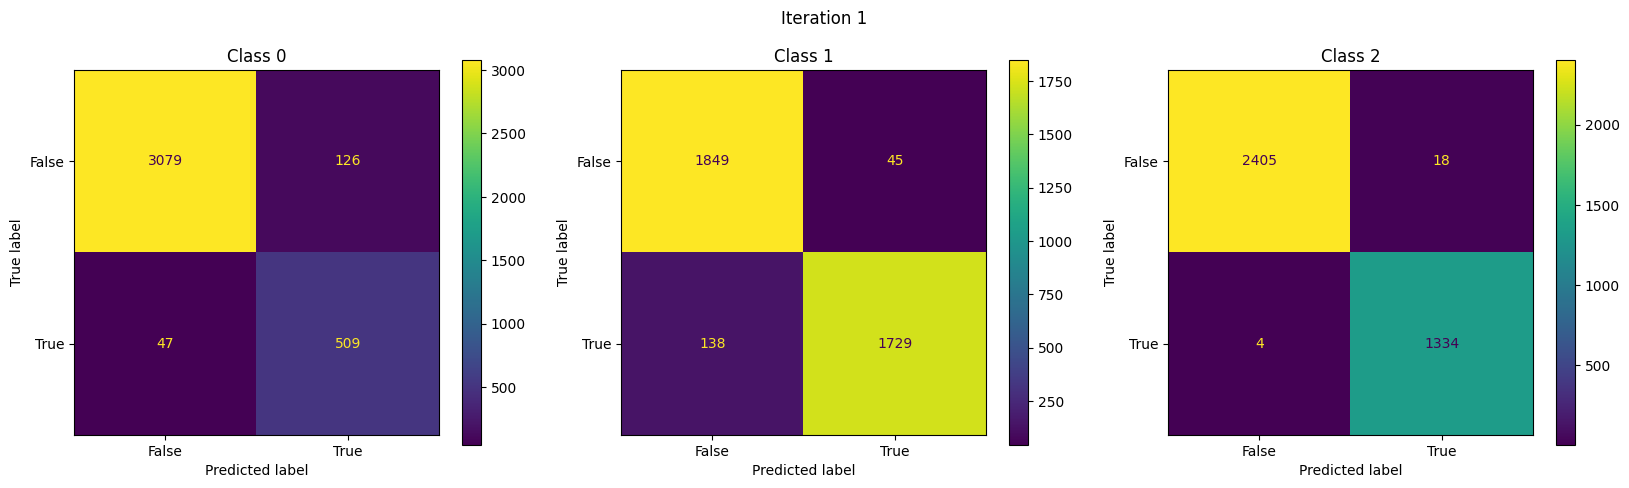

CNN Val accuracy trained on Seed Set for iteration 1:  95.36621570587158
CNN Val accuracy trained on Lake Set for iteration 1:  97.90732264518738
CNN Val accuracy trained on Oracle for iteration 1:  98.20627570152283
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models


100%|██████████| 100/100 [00:02<00:00, 35.42it/s]


Iteration 2
Labels of Lake Class 0: 363
Labels of Lake Class 1: 1661
Labels of Lake Class 2: 1137
Labels of Labelled Set 0: 45
Labels of Labelled Set 1: 45
Labels of Labelled Set 2: 45
Shape of Labeled Data: (135, 28, 28, 3)
Shape of Unlabeled Data: (3161, 28, 28, 3)
Accuracy on unlabelled images: 95.00158177791837
2 (3161, 3)
Num img per class = 200
Number of images getting transferred: 600
Accuracy of Pseudo-labelled img added to dataset: 97.83333333333334


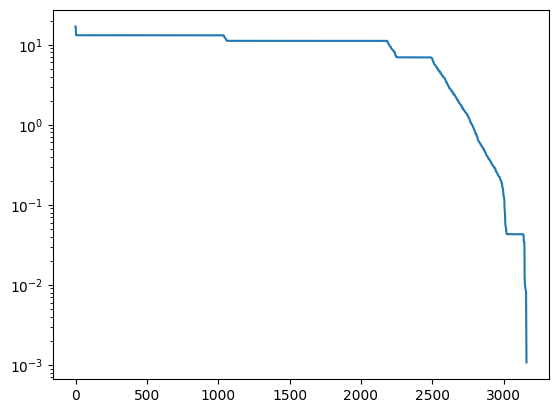

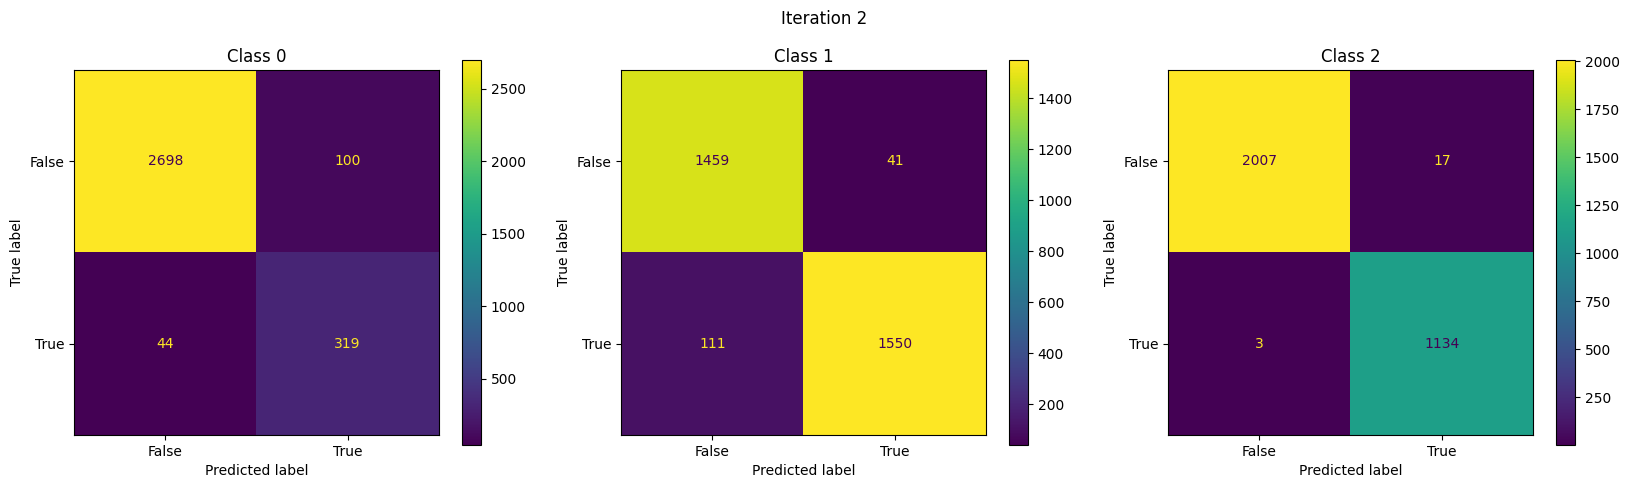

CNN Val accuracy trained on Seed Set for iteration 2:  80.71748614311218
CNN Val accuracy trained on Lake Set for iteration 2:  96.71151041984558
CNN Val accuracy trained on Oracle for iteration 2:  97.90732264518738
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models


100%|██████████| 100/100 [00:03<00:00, 25.87it/s]


Iteration 3
Labels of Lake Class 0: 172
Labels of Lake Class 1: 1450
Labels of Lake Class 2: 939
Labels of Labelled Set 0: 60
Labels of Labelled Set 1: 60
Labels of Labelled Set 2: 60
Shape of Labeled Data: (180, 28, 28, 3)
Shape of Unlabeled Data: (2561, 28, 28, 3)
Accuracy on unlabelled images: 94.0257711831316
3 (2561, 3)
Num img per class = 200
Number of images getting transferred: 600
Accuracy of Pseudo-labelled img added to dataset: 88.66666666666667


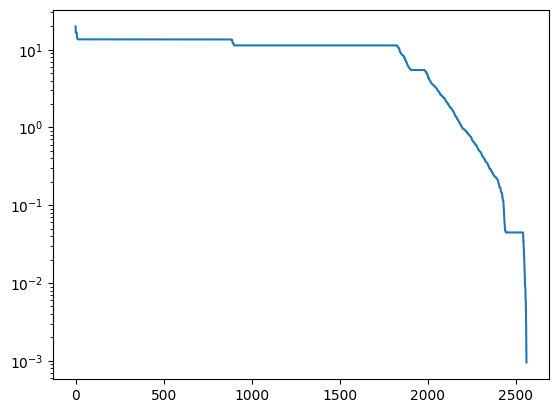

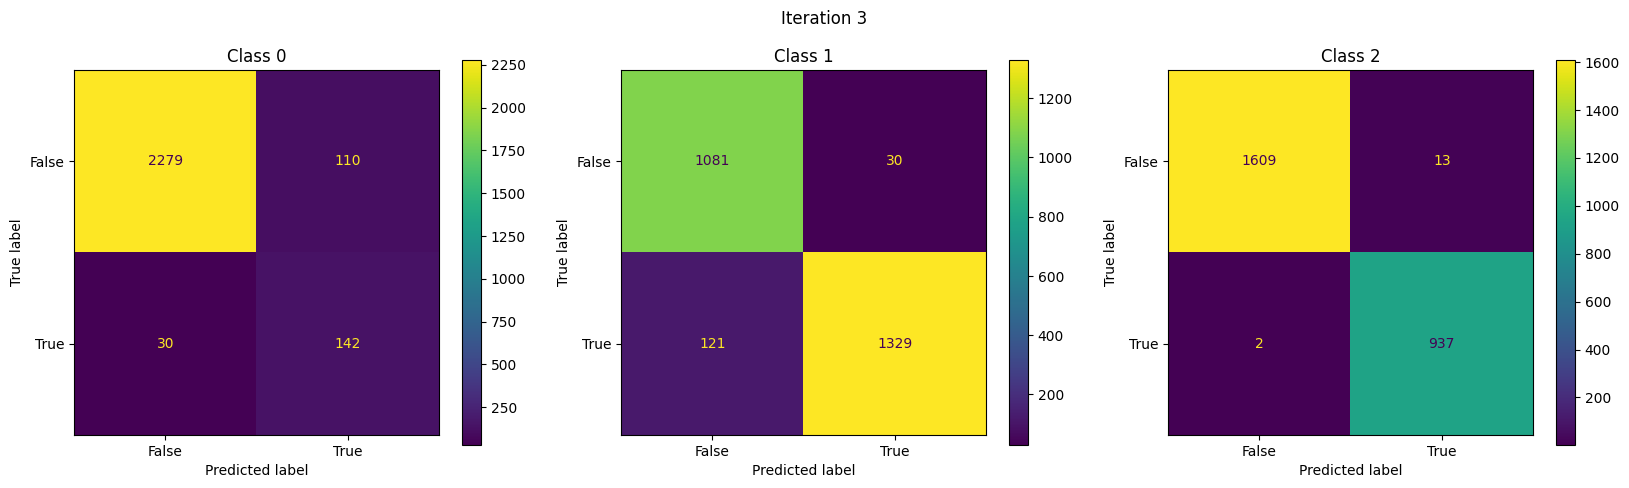

CNN Val accuracy trained on Seed Set for iteration 3:  92.67563819885254
CNN Val accuracy trained on Lake Set for iteration 3:  92.82511472702026
CNN Val accuracy trained on Oracle for iteration 3:  97.15994000434875
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models


100%|██████████| 100/100 [00:02<00:00, 41.72it/s]


Iteration 4
Labels of Lake Class 0: 38
Labels of Lake Class 1: 1184
Labels of Lake Class 2: 739
Labels of Labelled Set 0: 75
Labels of Labelled Set 1: 75
Labels of Labelled Set 2: 75
Shape of Labeled Data: (225, 28, 28, 3)
Shape of Unlabeled Data: (1961, 28, 28, 3)
Accuracy on unlabelled images: 93.93166751657319
4 (1961, 3)
Num img per class = 200
Number of images getting transferred: 505
Accuracy of Pseudo-labelled img added to dataset: 82.37623762376238


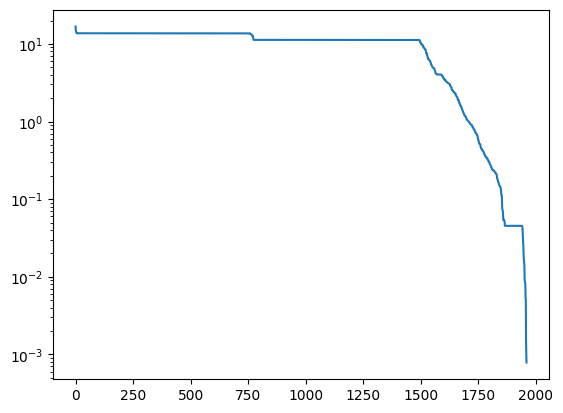

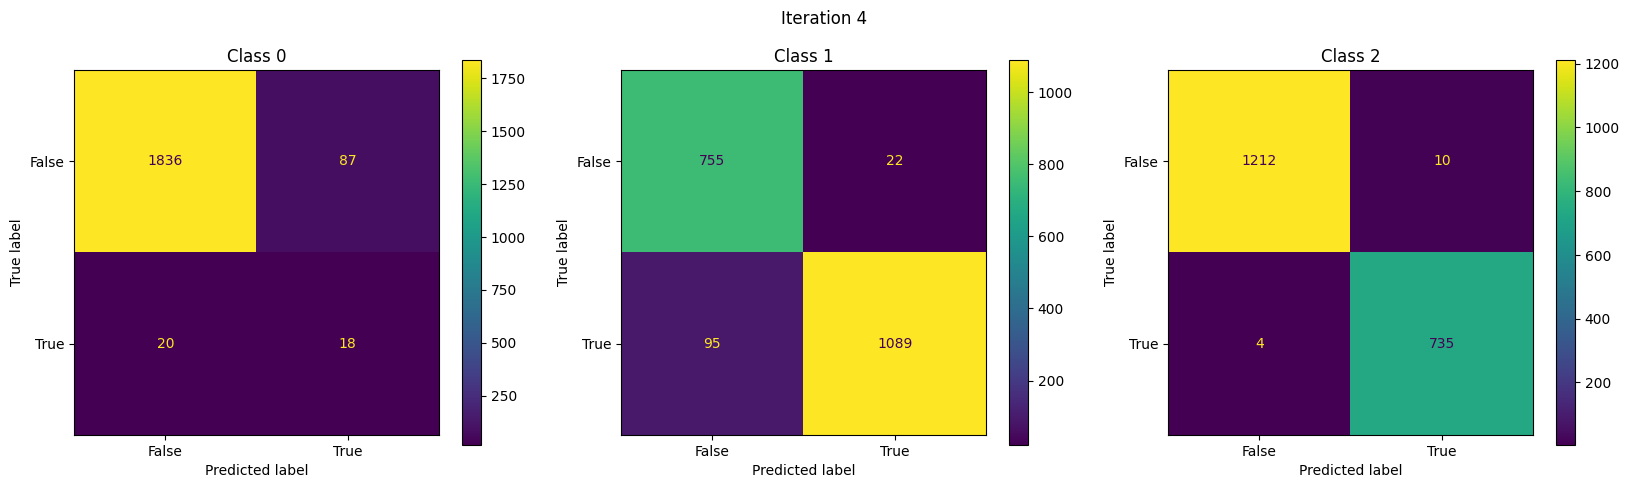

CNN Val accuracy trained on Seed Set for iteration 4:  92.67563819885254
CNN Val accuracy trained on Lake Set for iteration 4:  95.66517472267151
CNN Val accuracy trained on Oracle for iteration 4:  96.71151041984558
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models


100%|██████████| 100/100 [00:05<00:00, 19.20it/s]


Iteration 5
Labels of Lake Class 0: 18
Labels of Lake Class 1: 899
Labels of Lake Class 2: 539
Labels of Labelled Set 0: 90
Labels of Labelled Set 1: 90
Labels of Labelled Set 2: 90
Shape of Labeled Data: (270, 28, 28, 3)
Shape of Unlabeled Data: (1456, 28, 28, 3)
Accuracy on unlabelled images: 97.32142857142857
5 (1456, 3)
Num img per class = 200
Number of images getting transferred: 421
Accuracy of Pseudo-labelled img added to dataset: 95.72446555819477


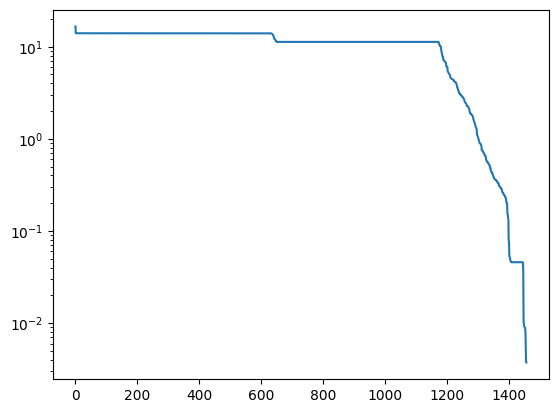

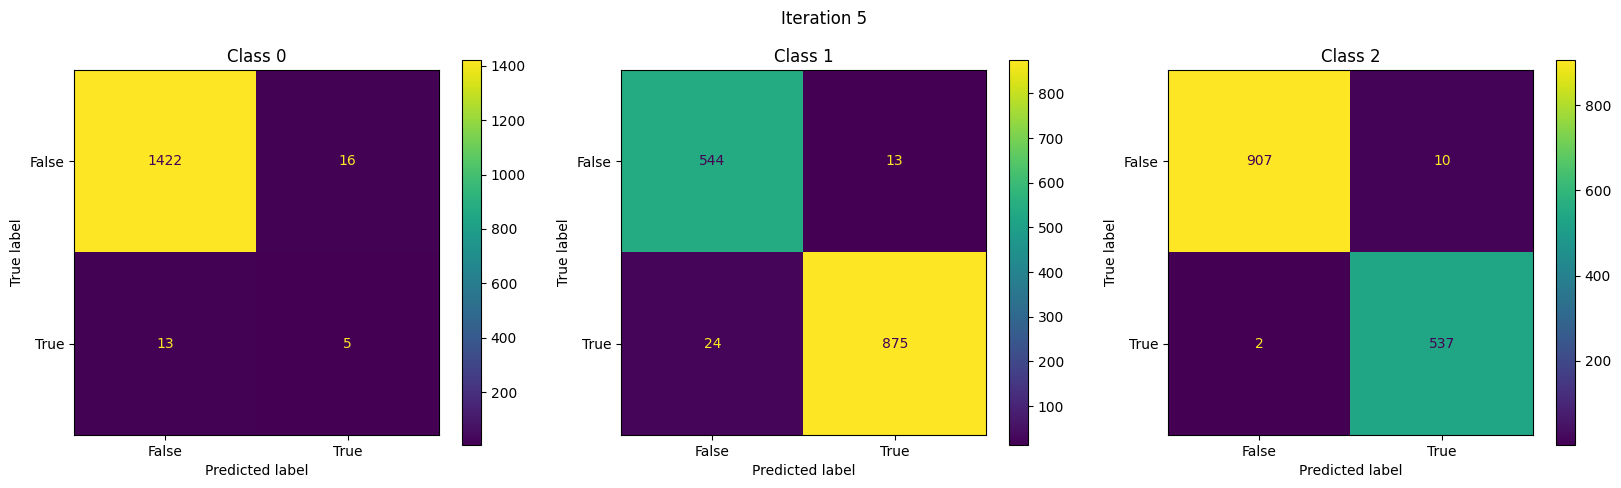

CNN Val accuracy trained on Seed Set for iteration 5:  96.41255736351013
CNN Val accuracy trained on Lake Set for iteration 5:  90.88191390037537
CNN Val accuracy trained on Oracle for iteration 5:  98.8041877746582
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models
Trained & Saved 5 models


100%|██████████| 100/100 [00:02<00:00, 49.78it/s]


Iteration 6
Labels of Lake Class 0: 13
Labels of Lake Class 1: 681
Labels of Lake Class 2: 341
Labels of Labelled Set 0: 105
Labels of Labelled Set 1: 105
Labels of Labelled Set 2: 105
Shape of Labeled Data: (315, 28, 28, 3)
Shape of Unlabeled Data: (1035, 28, 28, 3)
Accuracy on unlabelled images: 97.68115942028986
6 (1035, 3)
Num img per class = 200
Number of images getting transferred: 403
Accuracy of Pseudo-labelled img added to dataset: 99.0074441687345


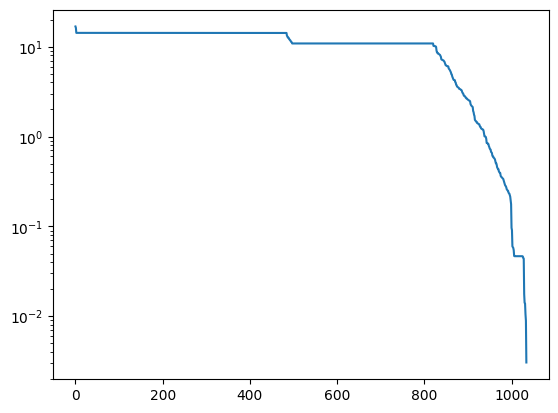

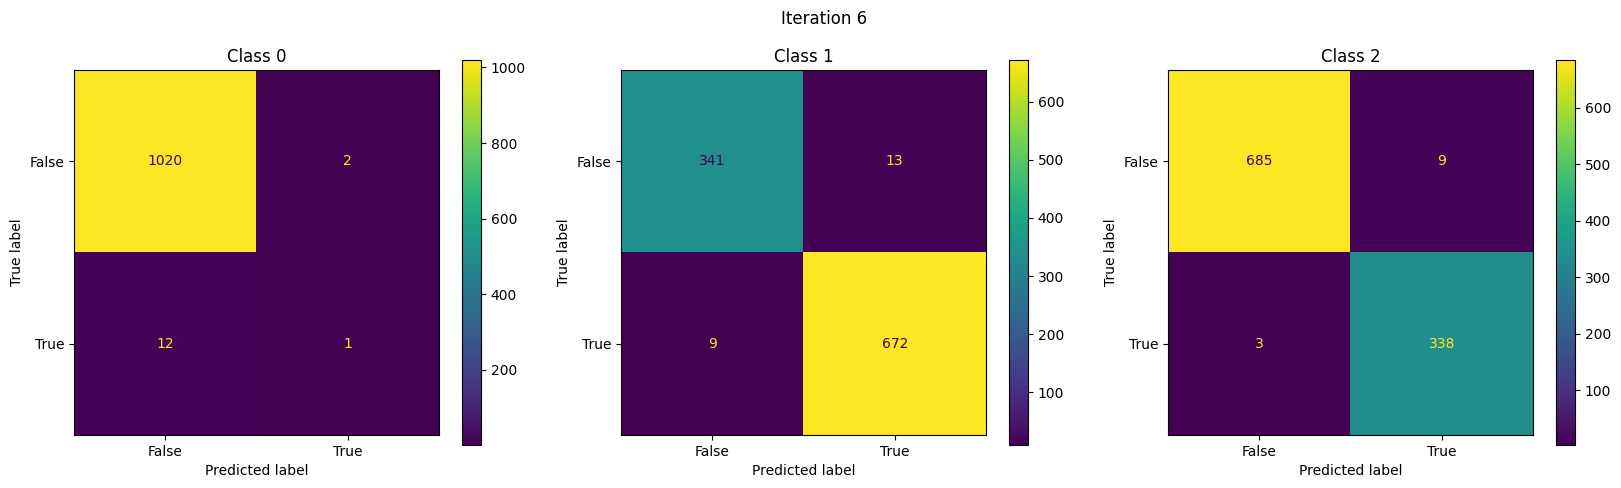

CNN Val accuracy trained on Seed Set for iteration 6:  97.60836958885193
CNN Val accuracy trained on Lake Set for iteration 6:  96.26308083534241
CNN Val accuracy trained on Oracle for iteration 6:  98.65471124649048


In [11]:
#  img_per_class: num images added per loop per class
x,y,xu,yu,confidence_list, val_scores, oracle_val_scores, classwise_accuracies, pl_accuracies, baseline = cage_loop(LFS, max_iters=7, threshold=10**-5,  img_per_class = 200)

In [12]:
df = pd.DataFrame([val_scores,oracle_val_scores,pl_accuracies,baseline], columns=[f'Iteration {i}' for i in range(len(pl_accuracies))], index=['Our Results','Oracle/Skyline','Pseudo Labelled','Baseline'])

In [13]:
df

,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,Iteration 5,Iteration 6
Our Results,89.536619,97.907323,96.711510,92.825115,95.665175,90.881914,96.263081
Oracle/Skyline,96.711510,98.206276,97.907323,97.159940,96.711510,98.804188,98.654711
Pseudo Labelled,98.166667,97.666667,97.833333,88.666667,82.376238,95.724466,99.007444
Baseline,78.026909,95.366216,80.717486,92.675638,92.675638,96.412557,97.608370


In [14]:
df2 = pd.DataFrame(classwise_accuracies, columns=[f'Class {i}' for i in range(3)], index=[f'Iteration {i}' for i in range(len(val_scores))])

In [15]:
df2

,Class 0,Class 1,Class 2
Iteration 0,92.547581,92.364137,99.541390
Iteration 1,95.400160,95.134273,99.415049
Iteration 2,95.444480,95.191395,99.367289
Iteration 3,94.533385,94.103866,99.414291
Iteration 4,94.543600,94.033656,99.286079
Iteration 5,98.008242,97.458791,99.175824
Iteration 6,98.647343,97.874396,98.840580
